importing lib

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.style.use("fivethirtyeight")
%matplotlib inline


csv file

In [ ]:
df=pd.read_csv('/content/Iris (1).csv')
df.head()
df.info()
df.describe()
df.shape
df.drop('Id',axis=1,inplace=True)
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df['Species'].value_counts()
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

<Axes: >

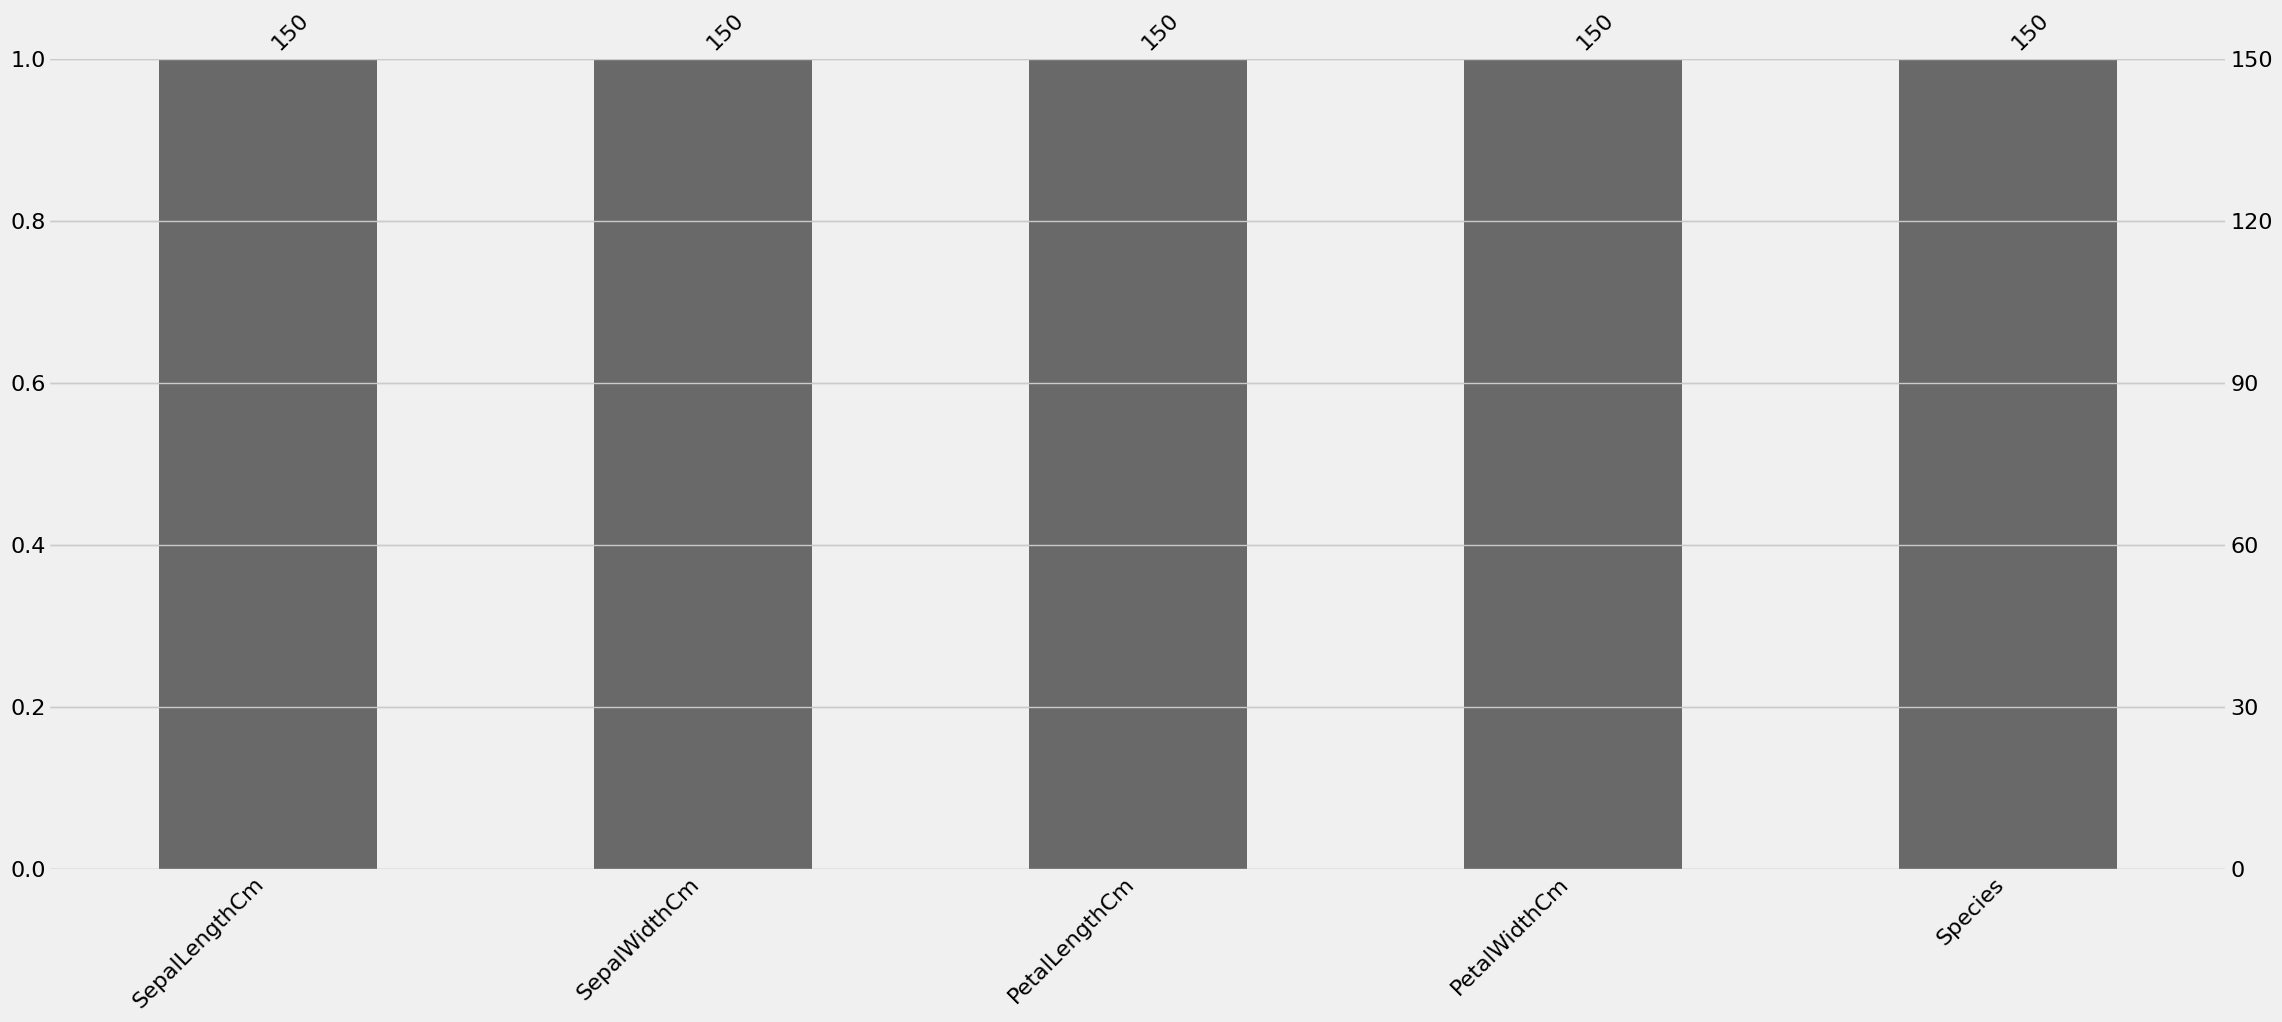

In [ ]:
import missingno as msno
msno.bar(df)

<Axes: xlabel='Species', ylabel='SepalLengthCm'>

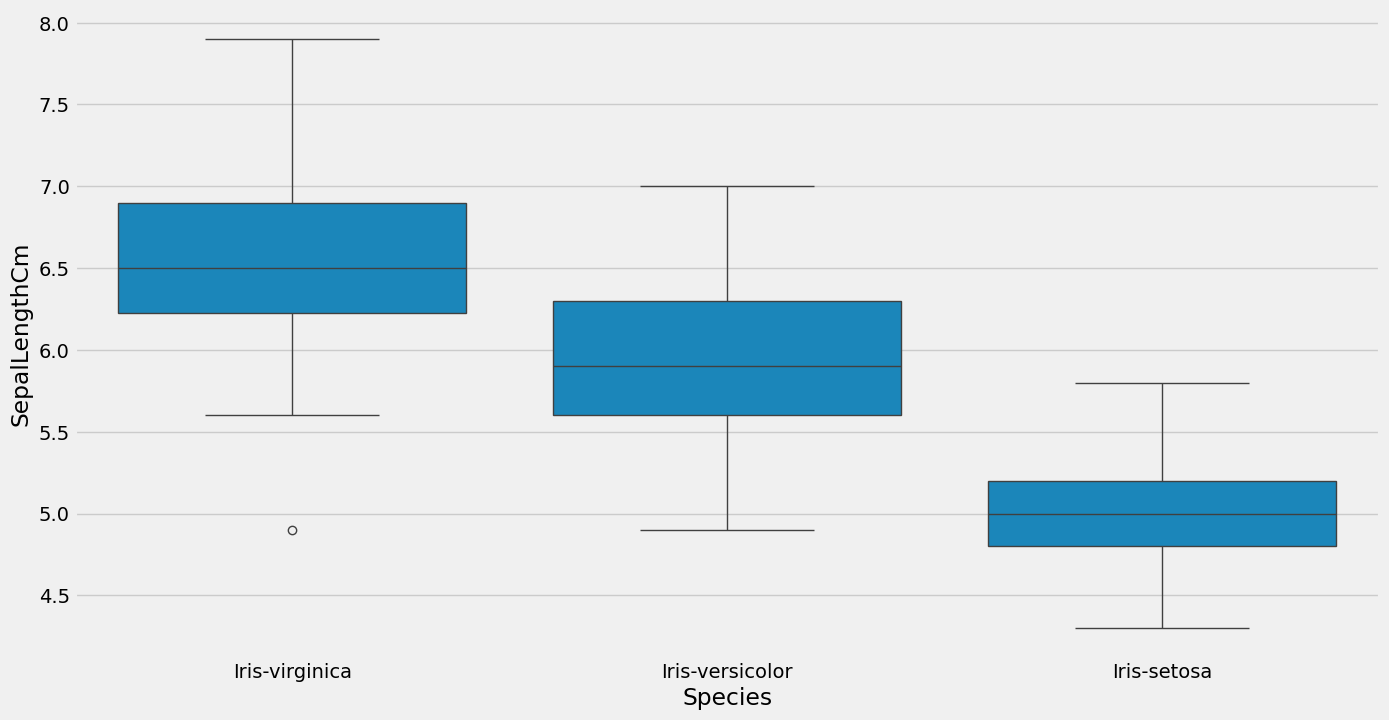

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='Species',y='SepalLengthCm',data=df.sort_values('SepalLengthCm',ascending=False))

<Axes: xlabel='SepalWidthCm', ylabel='SepalLengthCm'>

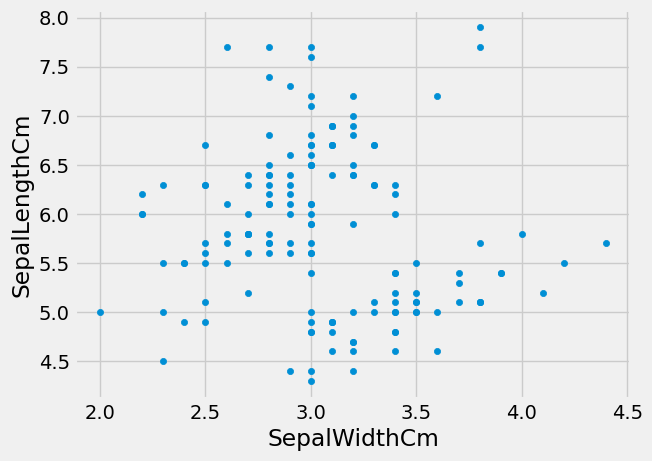

In [ ]:
df.plot(kind='scatter',x='SepalWidthCm',y='SepalLengthCm')

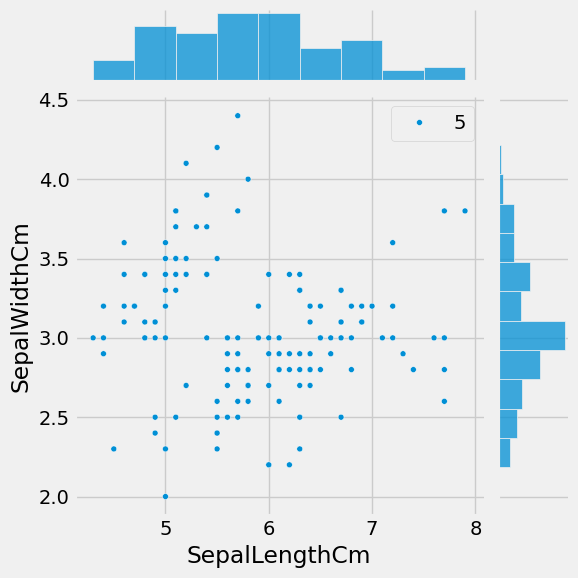

In [ ]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df, size=5)

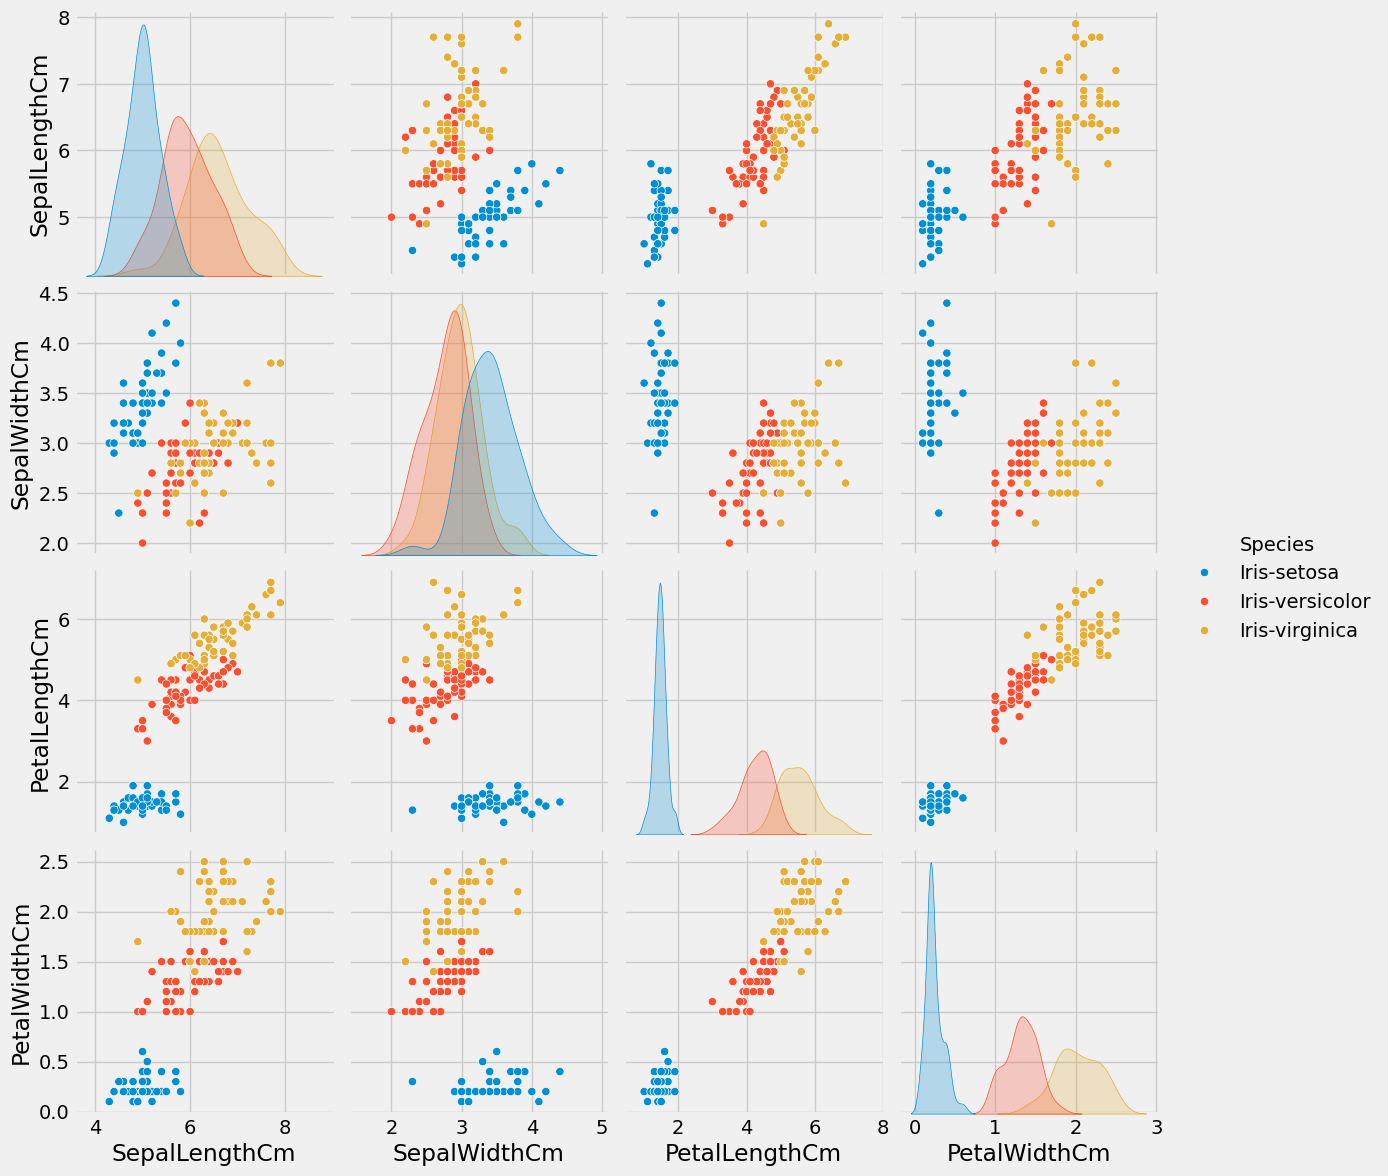

In [ ]:
sns.pairplot(df, hue="Species", size=3)

array([[<Axes: title={'center': 'PetalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'PetalWidthCm'}, xlabel='[Species]'>],
       [<Axes: title={'center': 'SepalLengthCm'}, xlabel='[Species]'>,
        <Axes: title={'center': 'SepalWidthCm'}, xlabel='[Species]'>]],
      dtype=object)

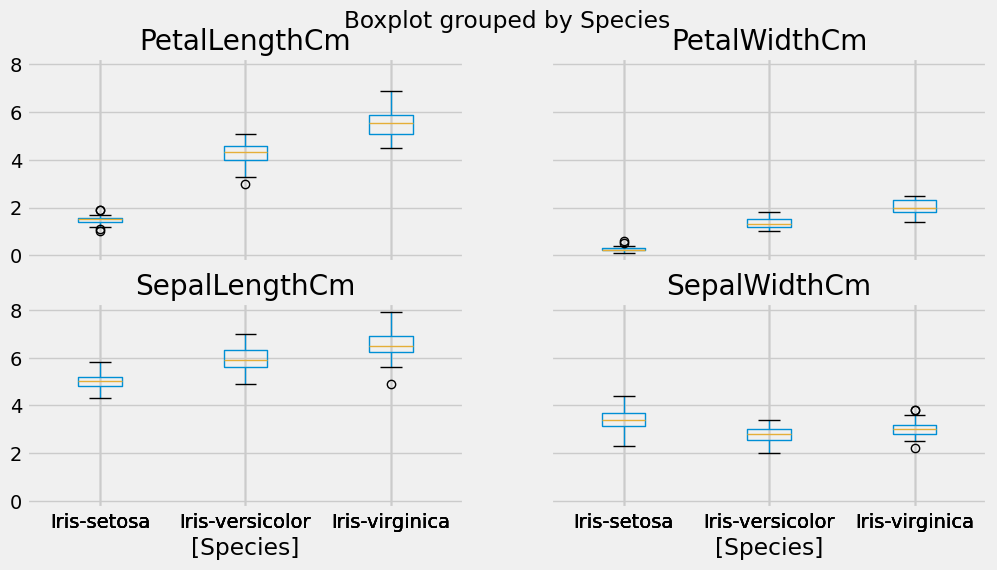

In [ ]:
df.boxplot(by="Species", figsize=(12, 6))

<Axes: >

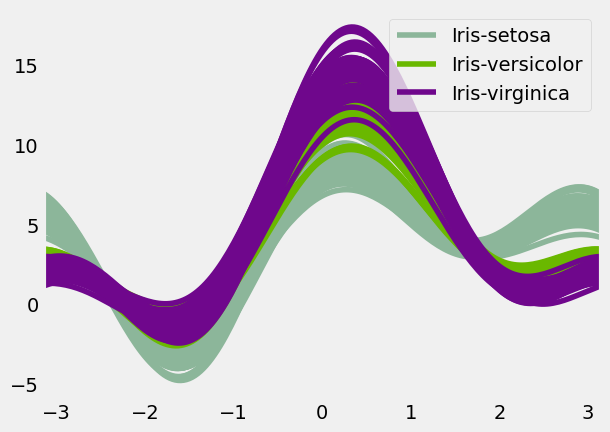

In [ ]:
import pandas.plotting
from pandas.plotting import andrews_curves
andrews_curves(df, "Species")


<Figure size 1500x1500 with 0 Axes>

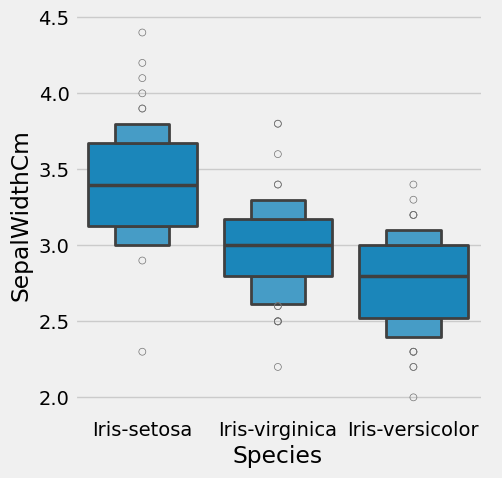

In [ ]:
plt.figure(figsize=(15,15))
sns.catplot(x='Species',y='SepalWidthCm',data=df.sort_values('SepalWidthCm',ascending=False),kind='boxen')

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

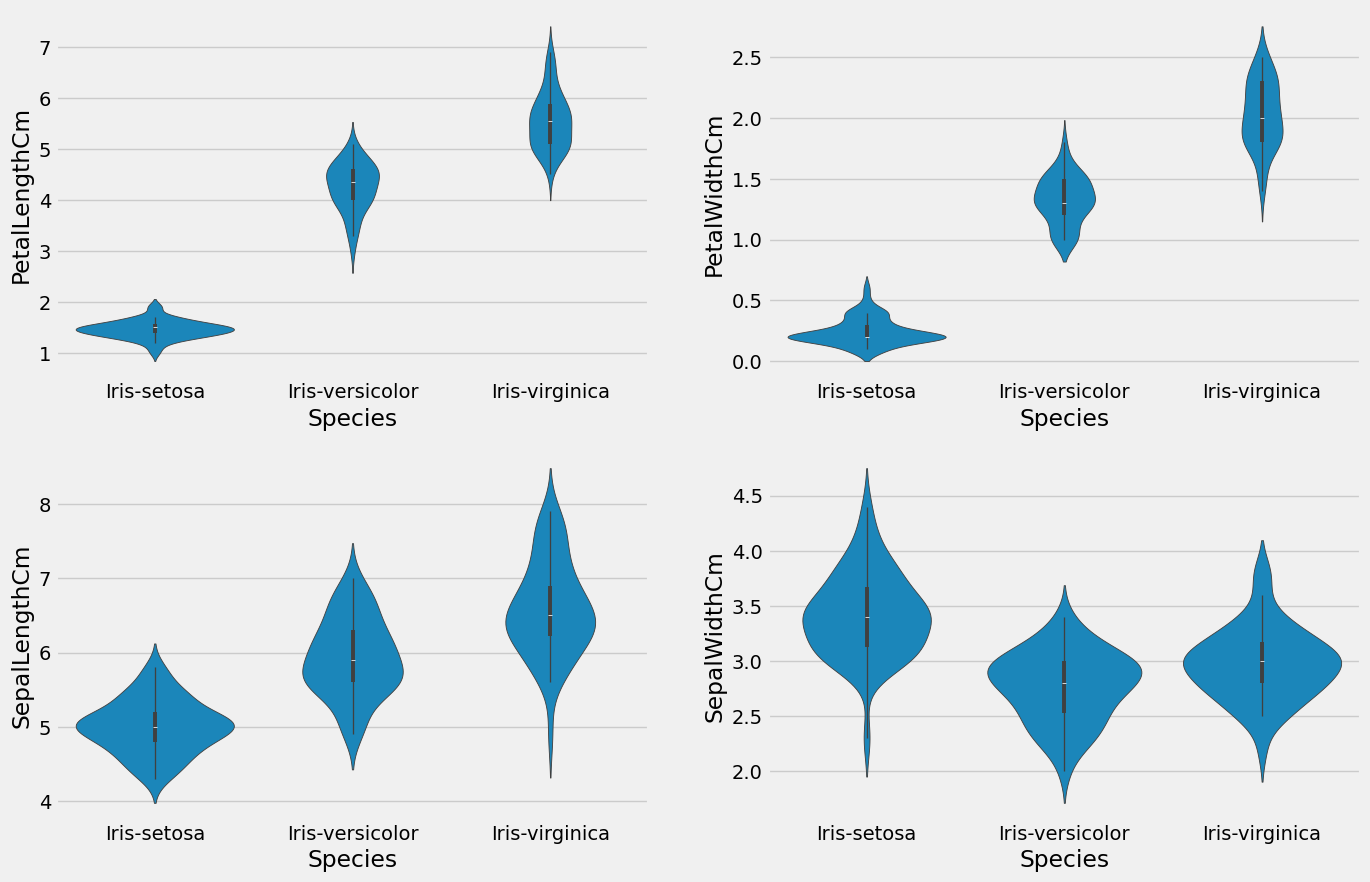

In [ ]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

In [ ]:
X=df.drop('Species',axis=1)
y=df['Species']


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

In [ ]:
df['Species'] = pd.Categorical(df.Species)
df['Species'] = df.Species.cat.codes
# Turn response variable into one-hot response vectory = to_categorical(df.response)
y = to_categorical(df.Species)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=123)

In [ ]:
model=Sequential()
model.add(Dense(100,activation='relu',input_shape=(4,)))

model.add(Dense(3,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
history=model.fit(X_train,y_train,epochs=45,validation_data=(X_test, y_test))

Epoch 1/45
4/4 [==============================] - 1s 89ms/step - loss: 1.1741 - accuracy: 0.0762 - val_loss: 1.0682 - val_accuracy: 0.2000
Epoch 2/45
4/4 [==============================] - 0s 12ms/step - loss: 1.0515 - accuracy: 0.4095 - val_loss: 1.0015 - val_accuracy: 0.3556
Epoch 3/45
4/4 [==============================] - 0s 18ms/step - loss: 1.0000 - accuracy: 0.3333 - val_loss: 0.9576 - val_accuracy: 0.3556
Epoch 4/45
4/4 [==============================] - 0s 12ms/step - loss: 0.9468 - accuracy: 0.4857 - val_loss: 0.9021 - val_accuracy: 0.6667
Epoch 5/45
4/4 [==============================] - 0s 18ms/step - loss: 0.8960 - accuracy: 0.6667 - val_loss: 0.8491 - val_accuracy: 0.6667
Epoch 6/45
4/4 [==============================] - 0s 18ms/step - loss: 0.8458 - accuracy: 0.6667 - val_loss: 0.8062 - val_accuracy: 0.6667
Epoch 7/45
4/4 [==============================] - 0s 17ms/step - loss: 0.8050 - accuracy: 0.6667 - val_loss: 0.7675 - val_accuracy: 0.6667
Epoch 8/45
4/4 [===========

In [ ]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 9ms/step - loss: 0.3554 - accuracy: 0.9333


[0.35540860891342163, 0.9333333373069763]

In [ ]:
pred = model.predict(X_test[:10])
print(pred)

1/1 [==============================] - 0s 81ms/step
[[0.01171814 0.4184529  0.56982887]
 [0.89974594 0.09186241 0.00839167]
 [0.06222646 0.58192223 0.35585132]
 [0.03279753 0.5807094  0.38649312]
 [0.94365686 0.05265361 0.00368954]
 [0.00197738 0.2917629  0.7062598 ]
 [0.01205297 0.42796147 0.55998564]
 [0.01462074 0.4345225  0.5508567 ]
 [0.0024378  0.27760917 0.71995306]
 [0.00220771 0.2396159  0.7581763 ]]


In [ ]:
p=np.argmax(pred,axis=1)
print(p)
print(y_test[:10])

[2 0 1 1 0 2 2 2 2 2]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [ ]:
history.history['accuracy']

[0.07619047909975052,
 0.4095238149166107,
 0.3333333432674408,
 0.48571428656578064,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6761904954910278,
 0.8095238208770752,
 0.8476190567016602,
 0.761904776096344,
 0.6857143044471741,
 0.6761904954910278,
 0.6857143044471741,
 0.761904776096344,
 0.8380952477455139,
 0.8666666746139526,
 0.9523809552192688,
 0.9904761910438538,
 0.9904761910438538,
 0.9523809552192688,
 0.8476190567016602,
 0.8095238208770752,
 0.8666666746139526,
 0.9428571462631226,
 0.9809523820877075,
 0.9714285731315613,
 0.961904764175415,
 0.9238095283508301,
 0.9047619104385376,
 0.9333333373069763,
 0.9809523820877075,
 0.9809523820877075,
 0.9809523820877075,
 0.9714285731315613,
 0.9333333373069763,
 0.9142857193946838,
 0.9714285731315613,
 0.9809523820877075,
 0.9809523820877075,
 0.9714285731315613]

In [ ]:
history.history['val_accuracy']

[0.20000000298023224,
 0.35555556416511536,
 0.35555556416511536,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6666666865348816,
 0.6888889074325562,
 0.7777777910232544,
 0.8444444537162781,
 0.8222222328186035,
 0.6888889074325562,
 0.6666666865348816,
 0.7555555701255798,
 0.7555555701255798,
 0.800000011920929,
 0.8444444537162781,
 0.8888888955116272,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.8444444537162781,
 0.7777777910232544,
 0.800000011920929,
 0.8888888955116272,
 0.9555555582046509,
 0.9333333373069763,
 0.9333333373069763,
 0.8888888955116272,
 0.8888888955116272,
 0.8888888955116272,
 0.9555555582046509,
 0.9555555582046509,
 0.9555555582046509,
 0.9333333373069763,
 0.9111111164093018,
 0.8888888955116272,
 0.9111111164093018,
 0.9555555582046509,
 0.9777777791023254,
 0.9555555582046509,
 0.9333333373069763]

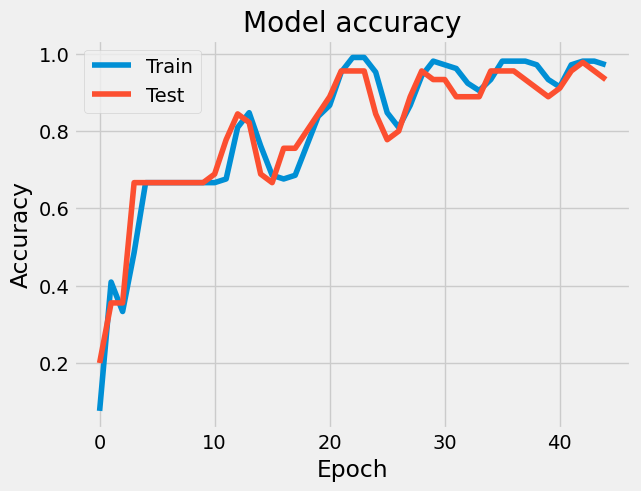

In [ ]:
plt.figure()


plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'])
plt.show()